<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S1_C4_EDA_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA: Exploratory Data Analysis ( Análisis Exploratorio de Datos) Campañas de marketing



##caracteristicas o columnas
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
* Response (target): 1 if customer accepted the offer in the last campaign, 0 otherwise.
* Complain: 1 if customer complained in the last 2 years.
* DtCustomer: Date of customer’s enrollment with the company.
* Education: Customer’s level of education.
* Marital: Customer’s marital status.
* Kidhome: Number of small children in customer’s household.
* Teenhome: Number of teenagers in customer’s household.
* Income: Customer’s yearly household income.
* MntFishProducts: Amount spent on fish products in the last 2 years.
* MntMeatProducts: Amount spent on meat products in the last 2 years.
* MntFruits: Amount spent on fruit products in the last 2 years.
* MntSweetProducts: Amount spent on sweet products in the last 2 years.
* MntWines: Amount spent on wine products in the last 2 years.
* MntGoldProds: Amount spent on gold products in the last 2 years.
* NumDealsPurchases: Number of purchases made with a discount.
* NumCatalogPurchases: Number of purchases made using a catalog.
* NumStorePurchases: Number of purchases made directly in stores.
* NumWebPurchases: Number of purchases made through the company’s website.
* NumWebVisitsMonth: Number of visits to the company’s website in the last month.
* Recency: Number of days since the last purchase.


In [ ]:
import pandas as pd #manejo de datos
import numpy as np #manejo de operaciones entre datos y columnas
import matplotlib.pyplot as plt #para el manejo de graficas
import seaborn as sns #para el manejo de graficas " mejora de matplotlib"

importar desde drive

In [ ]:
from google.colab import drive # conectandonos con google drive
drive.mount('/content/drive')
import os # la libreria necesaria de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET') # es el codigo que nos permite ingresar la ruta de la carpeta para conectarme a drive

# muestra los archivos que hay en la ruta
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv',
 'generated_classification_data.csv']

In [ ]:
df = pd.read_excel('marketing_campaign.xlsx') # da valor a una variable al ejecutar un archivo xlsx
# para .cvs pd.read_csv('/content/marketing_campaign.csv')

In [ ]:
df.info() # .info indica la informacion clave sobre la tabla
  # cantidad de columnas
  # cantidad de filas
  # nombre (ID) de cada columna
  # si estan las celdas de cada columna completa o falta informacion
  # el tipo de dato que maneja cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()
# describe me entrega un resumen solo de los atributos numericos
# count= numero de registros
# mean= promedio
# std= desviación : promedio de datos alejados con relacion a la media
# min= dato minimo
# max= dato maximo


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Que tamaño tiene el data set
df.shape
# (filas"X", colum,nas"Y")

(2240, 29)

In [ ]:
# Que tipo de etiquetas de educación
print(df['Education'].unique())

## Observa: que hay 5 categorias en educación
## Un atributo categorico tiene clases finitas, siempre sera del tipo object

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [ ]:
# Que categorias de estado civil tenemos
print(df['Marital_Status'].unique()) # muestra los valores unicos de una columna

## Observa: para esta civil hay 8 categorías
## YOLO: You Onli Live Once

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
# Que edad tienen los clientes

# tengo el atributo año de nacimiento: Year_Birth
# Debo crear un nuevo atributo calculado
from datetime import date #se usa para trabajar con fechas, útil cuando necesitas manipular o comparar fechas en tus programas.
current_year = date.today().year
print(current_year)
df['Age'] = current_year - df['Year_Birth']
 # esta caracteristica ['Age'] no existia en df
  # la agregamos al darle valoa en df

2024


In [ ]:
df['Age'].head(4)

,Age
0,67
1,70
2,59
3,40


In [ ]:
#shape entrega numero de registros y atributos
df.shape

(2240, 30)

In [ ]:
df.info() # muetra ['Age']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: >

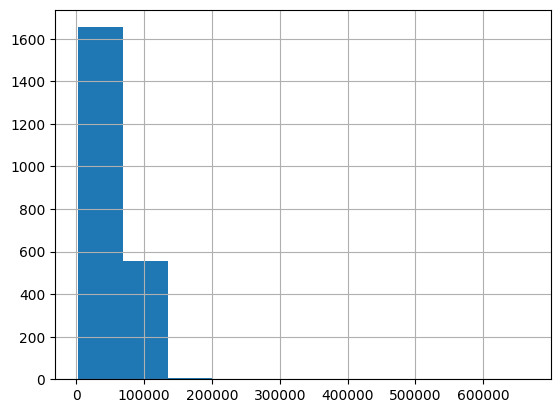

In [ ]:
df['Income'].hist() # funcion numpy muestra un histograma

<Axes: title={'center': 'Income'}, xlabel='Education'>

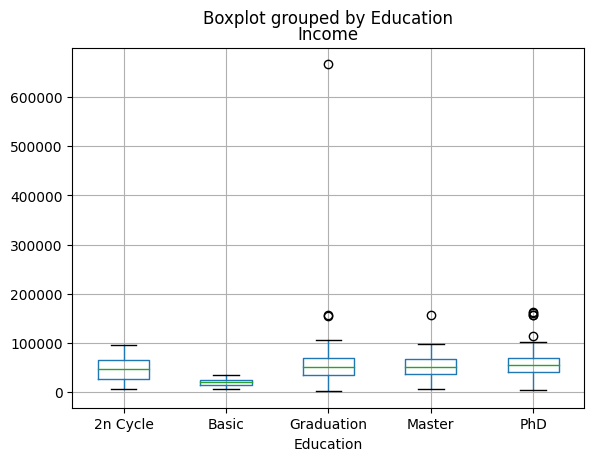

In [ ]:
df.boxplot(column="Income", by="Education")
  # .boxplot diagrama de cajas
    # mediana (linea dentro de la caja)
    # Q1 y Q3 primer y cuarto cuartil  ( bordes/lineas fuera de la caja)
    # outliers valores atipicos (puntos o circulos)
    # el rectangulo representa la mitad de los datos mayormente concentrados

# Observación
* En los clientes el máximo ingreso son de 10000 USD anuales, menos para quienes tienen educacion básica
*


<Axes: title={'center': 'Kidhome'}, xlabel='Education'>

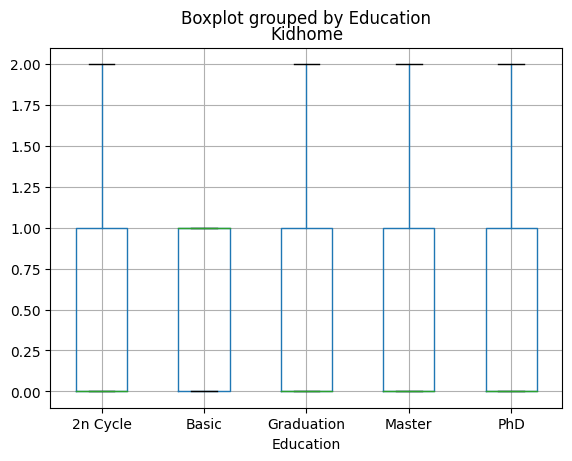

In [ ]:
df.boxplot(column="Kidhome", by="Education")
  # column="" es la columna de interes(Y)
  # by="" es el atributo categorico(X)


<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

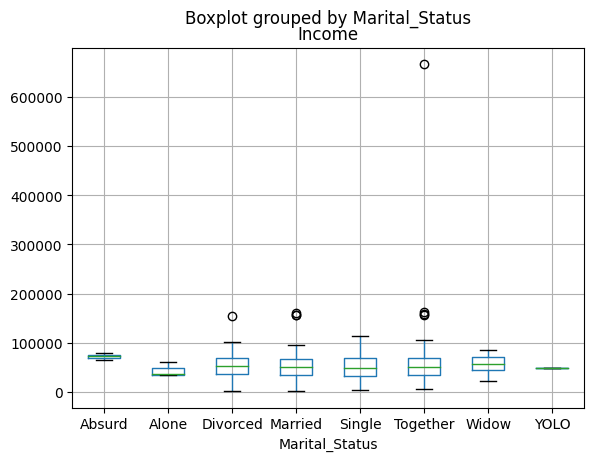

In [ ]:
# Correct the column name to "Marital_Status"
df.boxplot(column="Income", by="Marital_Status")

<Axes: title={'center': 'Income'}, xlabel='Age'>

<Figure size 100x100 with 0 Axes>

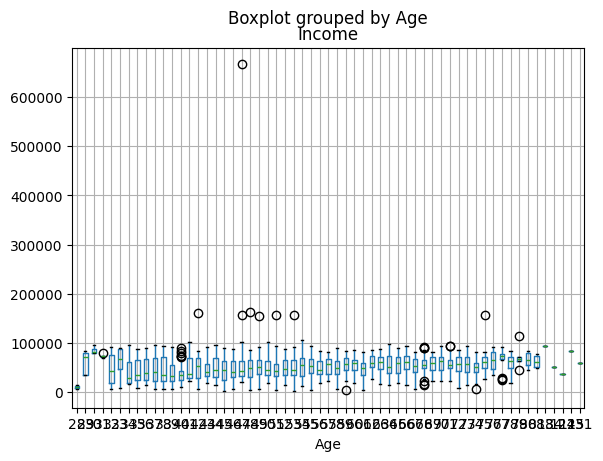

In [ ]:
# plt.figure(figsize=(1,1)) no sirve ?

df.boxplot(column="Income", by="Age")

In [ ]:
# lambda me da condiciones - cun atributo condicionalpara crear otro -registro-
## para sacar otras categorias
### youth
### middle aged
### old
df['Age_Group'] = df['Age'].apply(lambda x: 'Children' if x <= 16
                                  else ('Youth' if 17 <= x <= 30
                                  else ('Middle Aged' if 30 < x <=  45
                                  else 'Old'
    )
))

se esta creando una nueva categoria dentro de df con los datos de Age, usando
lambda para declarar una funcion en este caso x, se definen unas categorias o en este las caso condiciones para agrupar las edades en determinado tipo de poblacion. estos datos ya clasificados se agrupan para dar valor a la nueva categoria


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: title={'center': 'Kidhome'}, xlabel='Age_Group'>

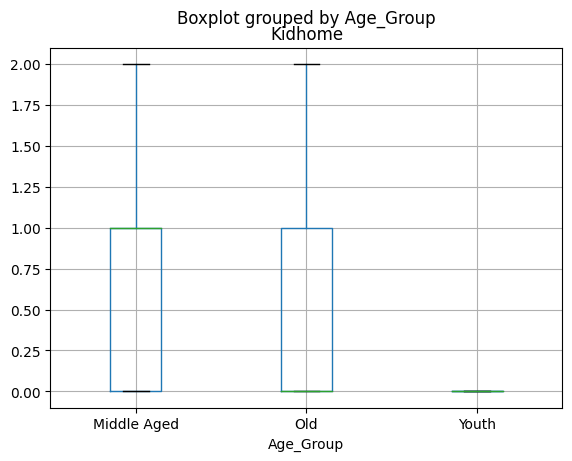

In [ ]:
#el codigo column debe tener datos numericos para generar graficas
df.boxplot(column="Kidhome", by="Age_Group")


cantidad de compras de cada **cliente** en los ultimos dos años

In [ ]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
# df['MntTotal'] es una nueva categoria agregada a df

In [ ]:
df[['MntTotal','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]


,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,1341,709,43,182,42,118,247
2236,444,406,0,30,0,0,8
2237,1241,908,48,217,32,12,24
2238,843,428,30,214,80,30,61


<Axes: title={'center': 'MntTotal'}, xlabel='Age_Group'>

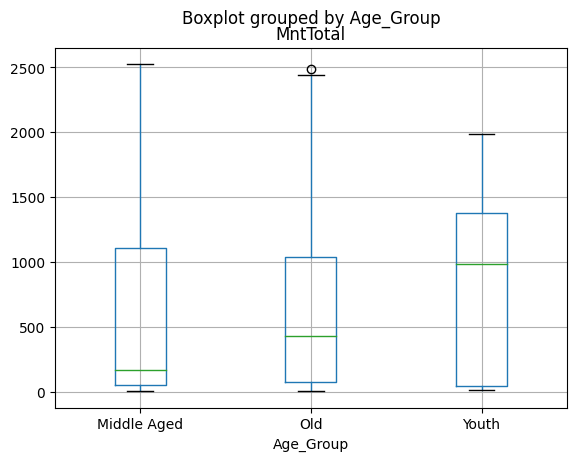

In [ ]:
df.boxplot(column="MntTotal", by="Age_Group")
